In [1]:
#使用預處理來提取更有意義的特徵。這裏使用主成份分析來提取150個基本元素，然後將其提供給支持向量機分類器。
#將這個預處理和分類器打包成管道
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import pandas as pd
from sklearn import metrics

data=pd.read_csv('G:/學校相關作業/人工智慧/期末報告_預測加速度/predict.csv',engine='python')
att=data.iloc[0:,:6]
RealPGA=data.iloc[0:,6:]


In [2]:
'''
SVC參數解釋 
（1）C: 目標函數的懲罰係數C，用來平衡分類間隔margin和錯分樣本的，默認為1.0。
（2）kernel：參數選擇有RBF, Linear, Poly, Sigmoid, 默認的是"RBF"。
（3）degree：degree決定了多項式的最高次冪。 
（4）gamma：核函數的係數('Poly', 'RBF' and 'Sigmoid'), 默認是gamma = 1 / n_features; 
（5）coef0：核函數中的獨立項，'RBF' and 'Poly'有效； 
（6）probablity: 可能性估計是否使用(true or false)； 
（7）shrinking：是否進行啟發式； 
（8）tol（default = 1e - 3）: svm結束標準的精度; 
（9）cache_size: 制定訓練所需要的內存（以MB為單位）； 
（10）class_weight: 每個類所佔據的權重，不同的類設置不同的懲罰參數C, 缺省的話自適應； 
（11）verbose: 跟多線程有關，不大明白啥意思具體； 
（12）max_iter:最大迭代次數，默認為1，如設為-1,則為無限制; 
（13）decision_function_shape：‘ovo’一對一；‘ovr’多對多；默認為None無
（14）random_state ：用於概率估計的數據重排時的偽隨機數生成器的種子。 
 ps：7,8,9一般不考慮。 
'''

model= SVR(kernel='rbf',C=1000,gamma=0.001)

In [3]:
#爲了測試分類器的訓練效果，將數據集分解成訓練集和測試集進行交叉檢驗

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(att,
                                                RealPGA,
                                                random_state=33,
                                                test_size = 0.3)
Xtrain= mms.fit_transform(Xtrain)
Xtest= mms.fit_transform(Xtest)

NameError: name 'mms' is not defined

In [4]:
#用網絡搜索交叉檢驗來尋找最優參數組合。通過不斷調整C（鬆弛變量）和參數gamma（控制徑向基函數核的大小），確定最優模型
'''from sklearn.model_selection import GridSearchCV
param_grid = {'C': [800,850,900],
              'gamma': [0.0001,0.001,0.01]}
grid = GridSearchCV(model,param_grid)

grid.fit(Xtrain, ytrain)
print(grid.best_params_)'''

"from sklearn.model_selection import GridSearchCV\nparam_grid = {'C': [800,850,900],\n              'gamma': [0.0001,0.001,0.01]}\ngrid = GridSearchCV(model,param_grid)\n\ngrid.fit(Xtrain, ytrain)\nprint(grid.best_params_)"

In [5]:
#有了交叉檢驗的模型，現在就可以對測試集的數據進行預測了
#model = grid.best_estimator_
model.fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
#模型分數

def mean_absolute_percentage_error(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

print('Anns的R sqaure:',metrics.r2_score(ytest,yfit))
print('Anns的MAPE:',mean_absolute_percentage_error(ytest,yfit))
print('Anns的MAE:',metrics.mean_absolute_error(ytest,yfit))
print('Anns的MSE:',metrics.mean_squared_error(ytest,yfit))
print('Anns的RMSE:',np.sqrt(metrics.mean_squared_error(ytest,yfit)))

Anns的R sqaure: 0.243612182261
Anns的MAPE: 61.339125408
Anns的MAE: 7.7371945084
Anns的MSE: 886.370699312
Anns的RMSE: 29.7719784246


C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:1441: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:1478: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


<function matplotlib.pyplot.show(*args, **kw)>

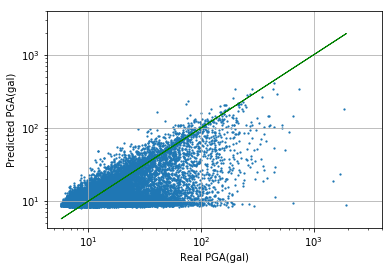

In [7]:
import matplotlib.pyplot as plt
x=ytest
y=yfit
plt.scatter(x,y, s=1.5,alpha=1)
plt.plot(x,x,color='green', linewidth=1.0)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0,4000)
plt.ylim(0,4000)
plt.xlabel('Real PGA(gal)')
plt.ylabel('Predicted PGA(gal)')
plt.grid()
plt.show